In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Coldest months

In [30]:
import xarray as xr

# Load both datasets
ds_temp = xr.open_dataset("emwcf/jan-feb-2015-2024/instant.nc")  # temperatures
ds_radiation = xr.open_dataset("emwcf/jan-feb-2015-2024/accum.nc")  # radiation

# Combine on time axis
ds_combined = xr.merge([ds_temp, ds_radiation])

# Convert to DataFrame
df = ds_combined.to_dataframe().reset_index()

# Convert Kelvin to Celsius
df['temp'] = df['t2m'] - 273.15
df['soil_0_7'] = df['stl1'] - 273.15

# Convert J/m² to W/m²
df['sun'] = df['ssrd'] / 3600

In [15]:
df = df.rename(columns={"valid_time": "time"})
df['month'] = pd.to_datetime(df['time']).dt.month
df = df.set_index('time')

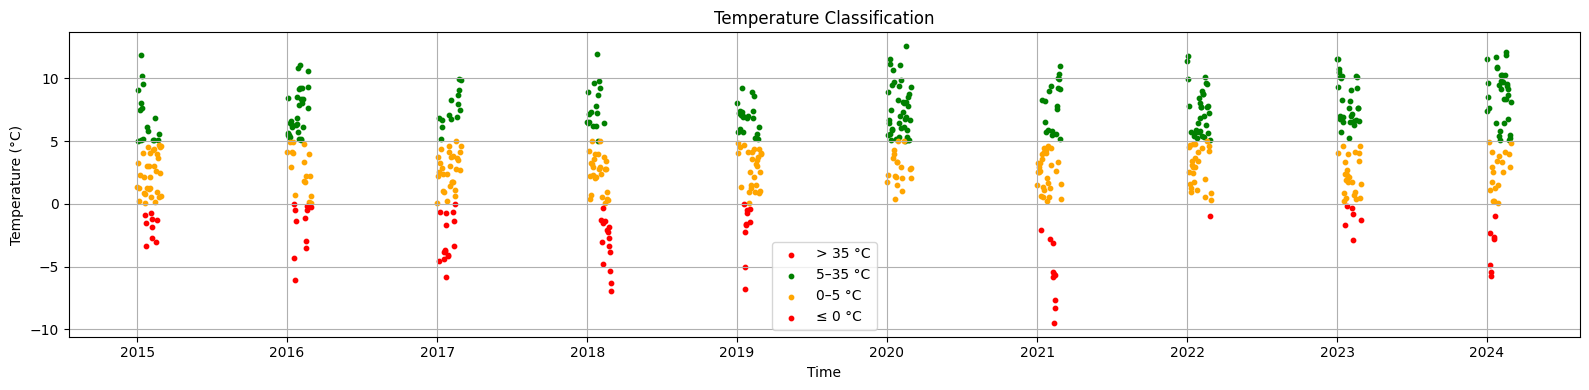

In [24]:
import matplotlib.pyplot as plt

# Define masks for each range
mask_red_hot = df['temp'] > 35
mask_green = (df['temp'] > 5) & (df['temp'] <= 35)
mask_orange = (df['temp'] > 0) & (df['temp'] <= 5)
mask_red_cold = df['temp'] <= 0

plt.figure(figsize=(16, 4))

# Plot each range with corresponding color
plt.scatter(df.index[mask_red_hot], df['temp'][mask_red_hot], color='red', label='> 35 °C', s=10)
plt.scatter(df.index[mask_green], df['temp'][mask_green], color='green', label='5–35 °C', s=10)
plt.scatter(df.index[mask_orange], df['temp'][mask_orange], color='orange', label='0–5 °C', s=10)
plt.scatter(df.index[mask_red_cold], df['temp'][mask_red_cold], color='red', label='≤ 0 °C', s=10)

plt.title("Temperature Classification")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
# Ensure the index is datetime (if not already)
df.index = pd.to_datetime(df.index)

# Step 1: Group by date and get daily minimum temperature
daily_min_temps = df['temp'].groupby(df.index.date).min()

# Step 2: Sort by temperature and select the 20 coldest days
coldest_20_days = daily_min_temps.sort_values().head(20)

# Display the result
print(coldest_20_days)

2021-02-11   -9.495209
2021-02-13   -8.333099
2021-02-12   -7.696869
2018-02-28   -6.925385
2019-01-21   -6.797455
2018-02-27   -6.293060
2016-01-19   -6.059174
2017-01-22   -5.843353
2021-02-09   -5.806732
2024-01-11   -5.763519
2021-02-14   -5.706390
2021-02-10   -5.562592
2024-01-10   -5.471283
2021-02-08   -5.460297
2018-02-26   -5.384125
2019-01-20   -5.007172
2024-01-09   -4.900482
2018-02-07   -4.806488
2017-01-06   -4.550140
2017-01-18   -4.407318
Name: temp, dtype: float32
